Chapter 05

# 圆周率小数点后数字分布
Book_5《统计至简》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

该代码首先计算并展示了圆周率 $\pi$ 的前1024位小数，将这些小数转换为32×32的矩阵，并通过热力图展示其分布。接着，它进一步计算不同位数（100、1000、10000、100000、1000000）的 $\pi$ 小数部分，统计每个数字（0至9）在这些位数中的出现频率，并绘制水平条形图显示分布情况。在条形图中，还添加了一条红色垂直虚线表示理论期望频率，即总位数的十分之一。

代码包含的主要公式：
- 理论频率：$$ \frac{\text{num\_digits}}{10} $$


In [1]:
from mpmath import mp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # 导入Seaborn用于绘制热力图

## 设置精度并计算圆周率的前1024位小数

In [2]:
mp.dps = 1024 + 1 # 设置精度为1024位小数
digits = str(mp.pi)[2:] # 提取圆周率小数部分
len(digits) # 计算小数位数

1024

In [3]:
digits_list = [int(x) for x in digits] # 将小数每一位转为整数列表

In [4]:
digits_array = np.array(digits_list) # 将列表转为数组

In [5]:
digits_matrix = digits_array.reshape((32, 32)) # 将数组重塑为32x32矩阵

## 绘制圆周率小数分布的热力图

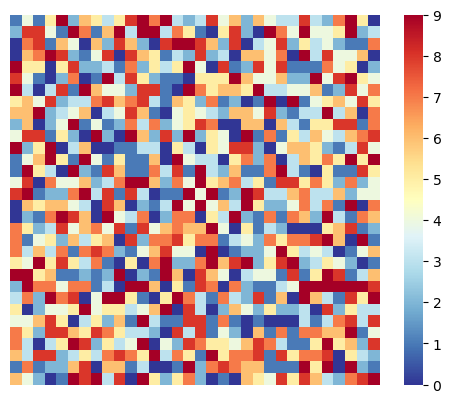

In [6]:
fig, ax = plt.subplots() # 创建绘图窗口

ax = sns.heatmap(digits_matrix, vmin=0, vmax=9, # 绘制热力图
                 cmap="RdYlBu_r", 
                 yticklabels=False,
                 xticklabels=False)

ax.set_aspect("equal") # 设置等比例坐标系
ax.tick_params(left=False, bottom=False) # 隐藏坐标刻度

## 统计不同位数下数字出现的频率分布并可视化

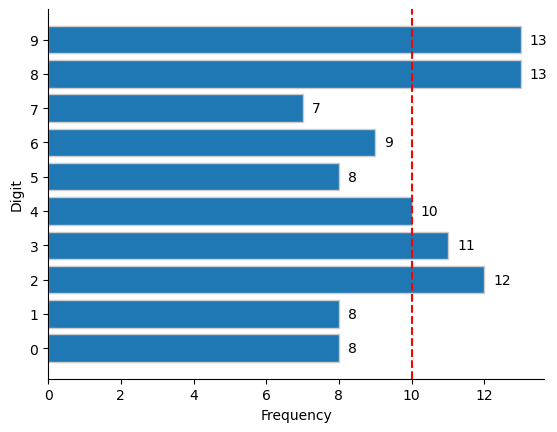

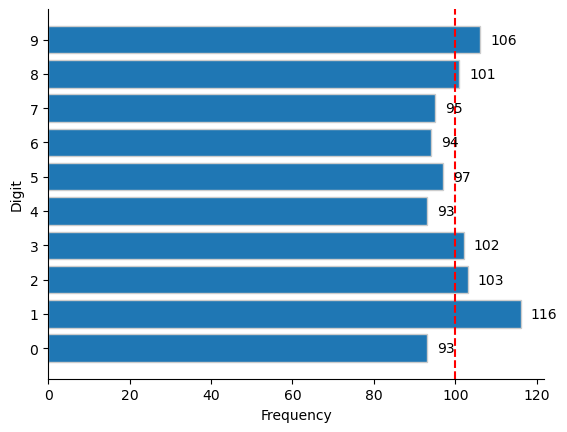

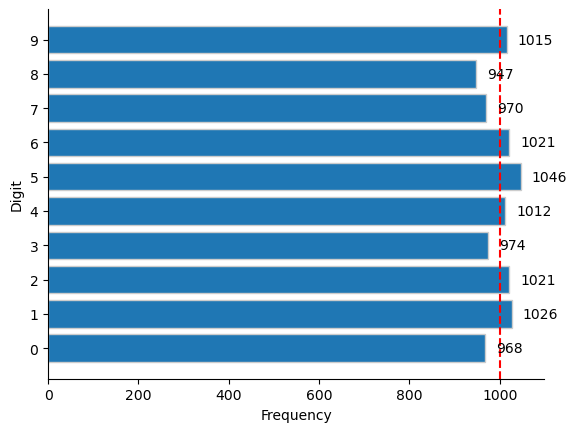

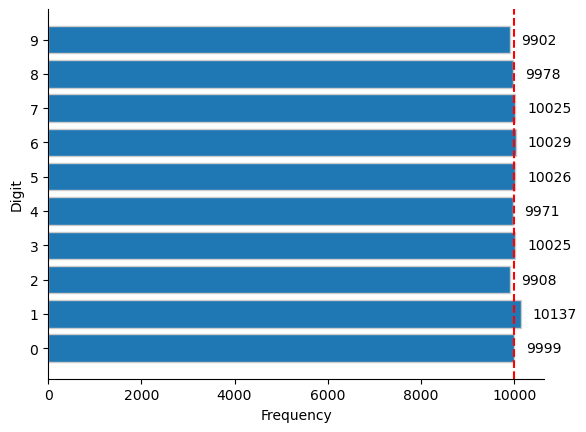

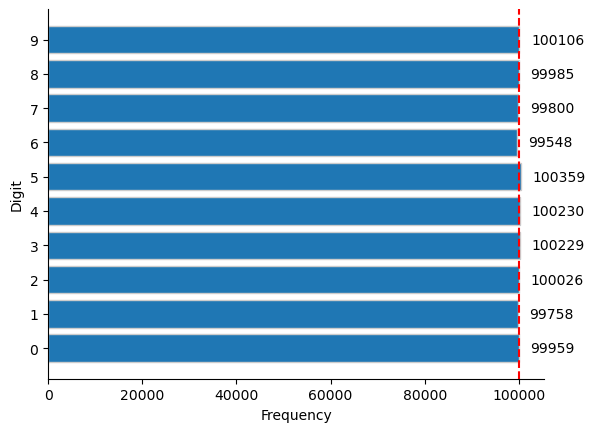

In [7]:
num_digits_array = [100, 1000, 10000, 100000, 1000000] # 定义不同的位数数组

for num_digits in num_digits_array:
    
    mp.dps = num_digits + 1 # 设置精度为num_digits位小数
    digits = str(mp.pi)[2:] # 获取圆周率小数部分
    len(digits) # 计算小数位数
    
    digits_list = [int(x) for x in digits] # 将小数每一位转为整数列表
    
    digits_array = np.array(digits_list) # 将列表转为数组
    
    fig, ax = plt.subplots() # 创建绘图窗口

    counts = np.bincount(digits_array) # 统计每个数字的出现频率
    
    ax.barh(range(10), counts, align='center', edgecolor=[0.8,0.8,0.8]) # 绘制水平条形图
    
    for i, v in enumerate(counts):
        ax.text(v + num_digits/400, i, str(v), color='k', va='center') # 在条形图上标注频率值
    
    ax.axvline(x=num_digits/10, color='r', linestyle='--') # 绘制红色虚线表示理论频率
    plt.yticks(range(10)) # 设置y轴刻度
    ax.spines['top'].set_visible(False) # 隐藏顶部边框
    ax.spines['right'].set_visible(False) # 隐藏右侧边框
    ax.set_xlabel('Frequency') # 设置x轴标签
    ax.set_ylabel('Digit') # 设置y轴标签